# 多項式回帰  スクラッチ実装
しおんがSlackに貼ってくれたHPの、重回帰分析のコードを土台にして、skleanのPolynomialFeatures()に相当する関数を自力で定義することにより、Bostonデータセットを題材に多項式回帰のスクラッチ実装をしました。

In [1]:
#必要なライブラリ（モジュール）のインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
% config InlineBackend.figure_format ='retina'

In [2]:
from sklearn.datasets import load_boston # bostonデータを格納したクラス
boston = load_boston()

In [3]:
# DataFrameを生成
df_data = pd.DataFrame(boston.data, columns=boston.feature_names)
df_target = pd.DataFrame(boston.target, columns=['TARGET'])
df = pd.concat([df_data, df_target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# 特徴量を抽出
X_1 = df.loc[:, ['LSTAT']].values
X_2 = df.loc[:, ['RM']].values
y = df.loc[:, ['TARGET']].values.reshape(506,)

In [5]:
def polynomial_features(X, degree): 
    m = len(X)
    a= np.ones(m).reshape(m, 1) 
    for i in range(1,degree+1):
        x = X ** i
        a = np.hstack([a, x])
    return a

In [6]:
X = polynomial_features(X_1, 2)
X

array([[ 1.    ,  4.98  , 24.8004],
       [ 1.    ,  9.14  , 83.5396],
       [ 1.    ,  4.03  , 16.2409],
       ...,
       [ 1.    ,  5.64  , 31.8096],
       [ 1.    ,  6.48  , 41.9904],
       [ 1.    ,  7.88  , 62.0944]])

In [7]:
# ホールド・アウト法によるデータの分割
# random_stateを0に固定してあるので､毎回同じサンプルに分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

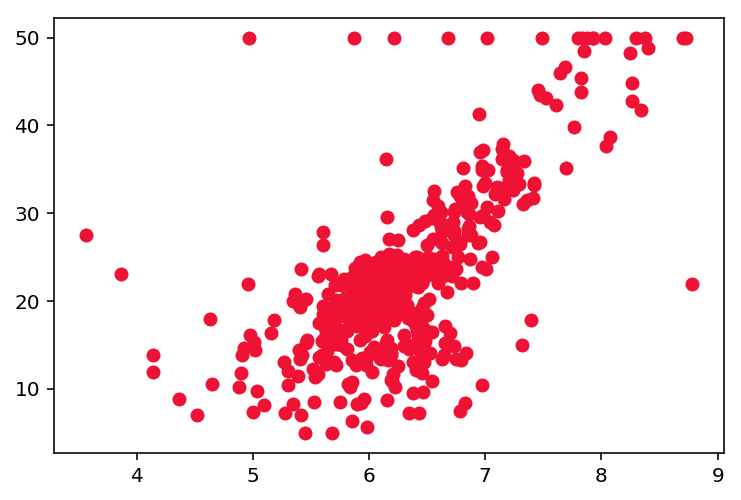

In [8]:
# fig = plt.figure()
plt.scatter(X_2, y, color='#ef1234')
plt.show()

In [9]:
def cost_function(X, y, B):
    m = len(y)
    J = np.sum((X.dot(B) - y) ** 2)/(2 * m)
    return J

In [10]:
# Initial Coefficients
B = np.array([0, 0, 0])

inital_cost = cost_function(X_train, y_train, B)
print(inital_cost)

301.06069209039543


In [ ]:
def gradient_descent(X, y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [ ]:
# 100000 Iterations
newB, cost_history = gradient_descent(X_train, y_train, B, 0.000000001, 1000000000)
theta = newB
# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])

In [ ]:
# Model Evaluation - RMSE
def rmse(X, y, theta):
    rmse = np.sqrt(sum((y - X.dot(theta)) ** 2) / len(y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(X, y, theta):
    mean_y = np.mean(y)
    ss_tot = sum((y - mean_y) ** 2)
    ss_res = sum((y - X.dot(theta)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [ ]:
y_pred = X_train.dot(newB)
y_pred.shape

In [ ]:
print('train rmse')
print(rmse(X_train, y_train, theta))
print('train rmse')
print(r2_score(X_train, y_train, theta))

In [ ]:
print('test rmse')
print(rmse(X_test, y_test, theta))
print('test rmse')
print(r2_score(X_test, y_test, theta))

In [ ]:
# 散布図に近似直線､近似曲線を重ねてみる
plt.scatter(X_2, y, color='lightgray', label='data') # 散布図を表示
x = np.arange(2, 10, 0.1)[:, np.newaxis]   # プロットのためのxも2変数変換する
x_quad = polynomial_features(x, 2)
Y = x_quad.dot(newB)
plt.plot(x, Y, color='green', label='quad') # 回帰曲線を表示（2次関数）
plt.xlabel('LSTAT')                                                  # x軸のラベルを表示
plt.ylabel('MEDV')                                                   # y軸のラベルを表示
plt.legend(loc = 'upper right')                                      # 凡例を表示
plt.show()

課題　<br>
X_2ではうまくいくけどX_1だとoverflowしてしまう・・・